In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ON_df = pd.read_csv('data/ON_2021.csv')
AB_df = pd.read_csv('data/AB_BC_2021.csv')

In [3]:
ptax_2021 = pd.concat([ON_df,AB_df], axis=0)

In [13]:
# Need to create common class for commercial/business/nonresidential
ptax_2021[ptax_2021['Municipality'] == 'Hamilton C'].head()

,Year,Municipality,PropertyClass,Rate,Province
555,2021.0,Hamilton C,Residential,0.009257,ON
556,2021.0,Hamilton C,Farmland,0.001748,ON
557,2021.0,Hamilton C,Commercial,0.024099,ON
558,2021.0,Hamilton C,Industrial,0.033907,ON


In [15]:
ptax_2021[ptax_2021['Municipality'] == 'EDMONTON'].head()

,Year,Municipality,PropertyClass,Rate,Province
21,2021.0,EDMONTON,NonResidential,0.024079,AB
22,2021.0,EDMONTON,Residential,0.009504,AB
23,2021.0,EDMONTON,Farm,0.009504,AB


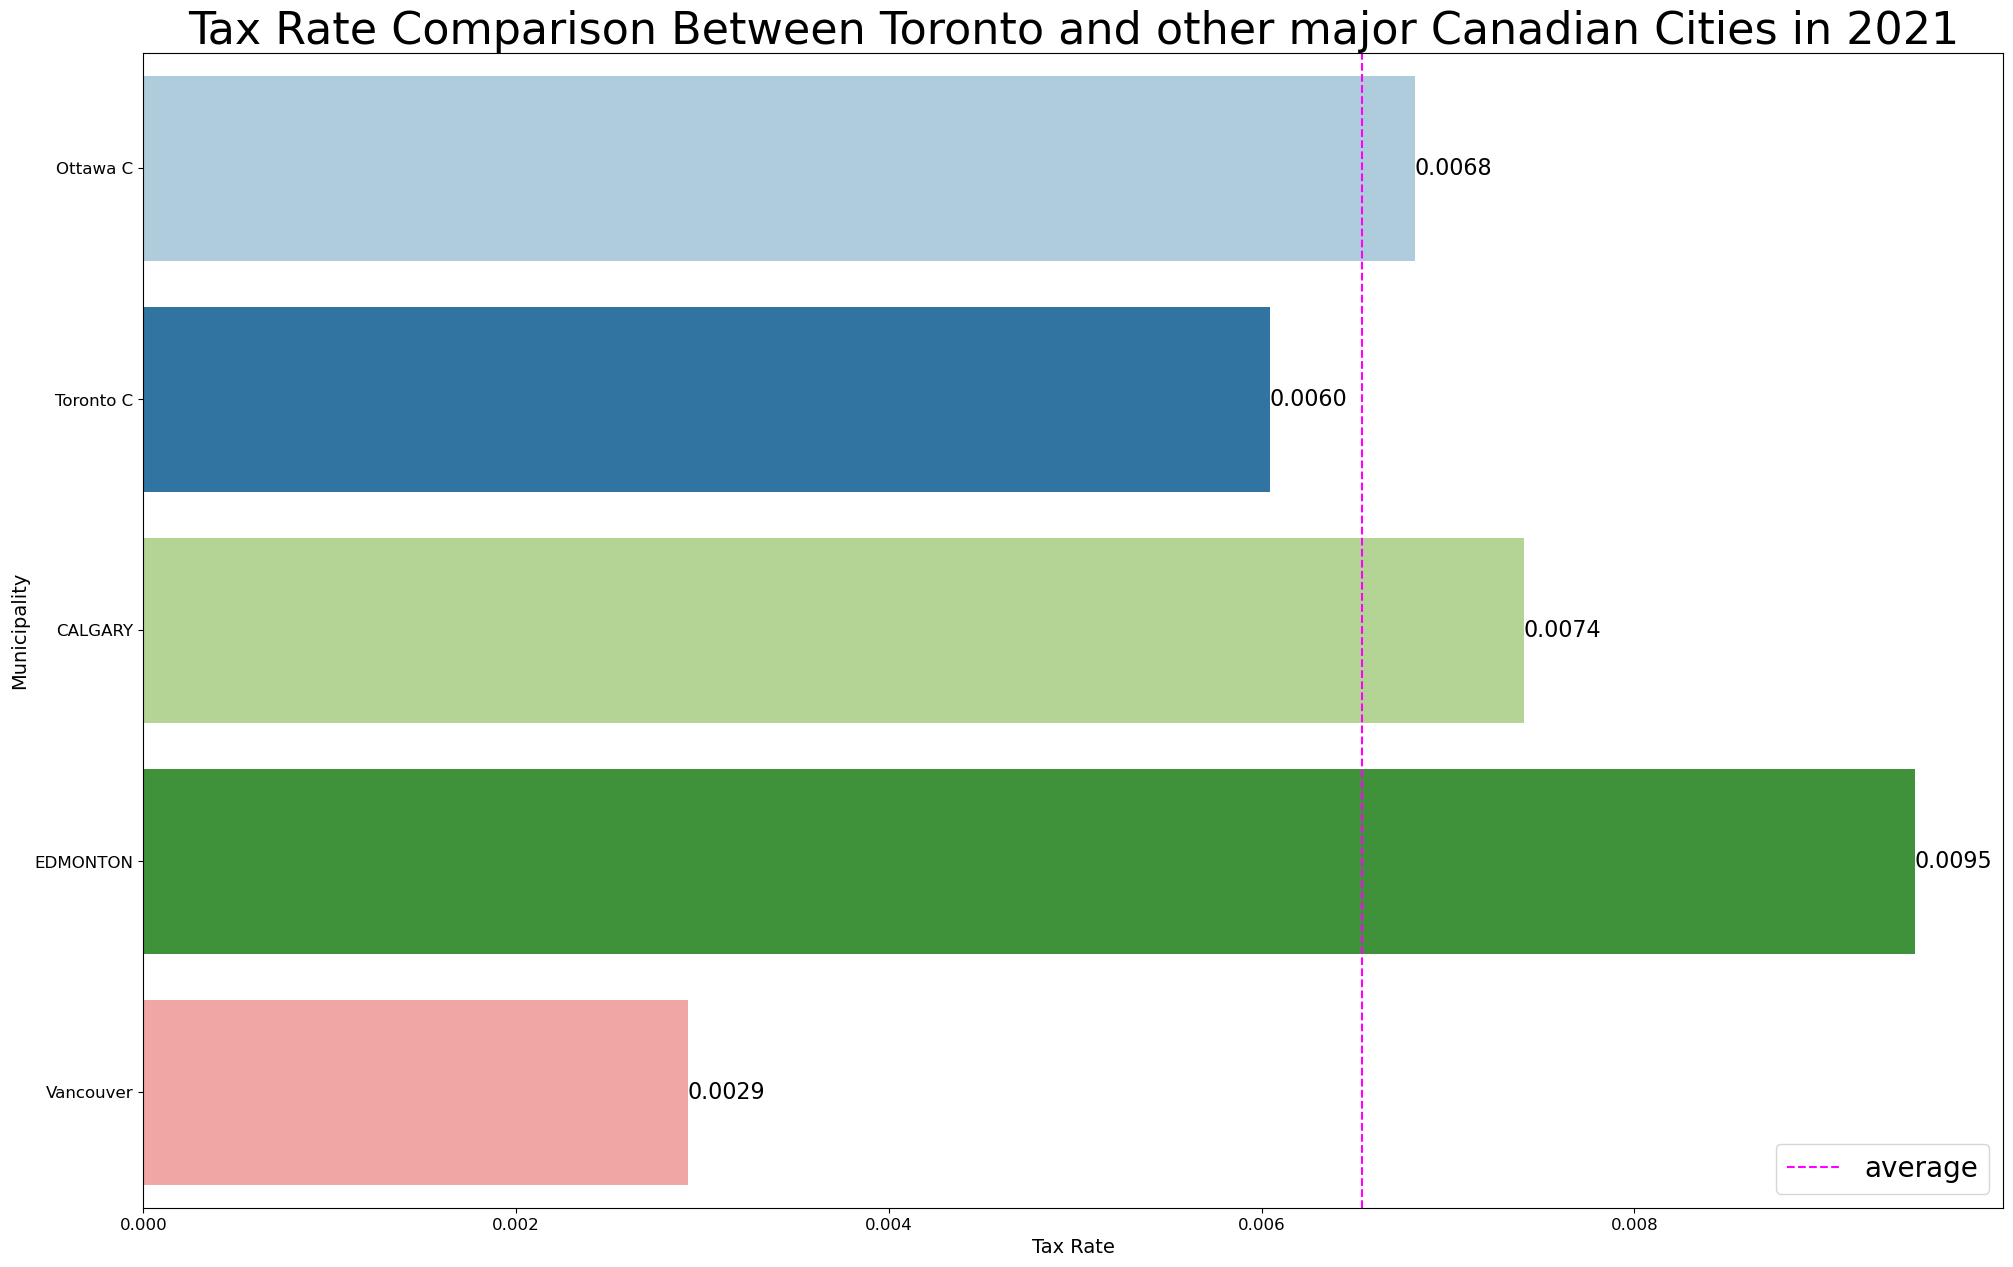

In [10]:
cities = ['Toronto C', 'Ottawa C', 'Vancouver', 'EDMONTON', 'CALGARY']
data = ptax_2021[(ptax_2021['Municipality'].isin(cities)) & (ptax_2021['PropertyClass'] == 'Residential')]

fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=data, y='Municipality', x='Rate', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Tax Rate Comparison Between Toronto and Other Major Canadian Cities in 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Rate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()